# Project 4

In [1]:
import pandas as pd
import altair as alt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [2]:
denver_url = 'https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_denver/dwellings_denver.csv'
dwellings_denver = pd.read_csv(denver_url)
ml_url = 'https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_ml/dwellings_ml.csv'
dwellings_ml = pd.read_csv(ml_url)
# has before1980 column 

## Organize Data

In [3]:
features = dwellings_ml.filter(['nocars', 'numbaths', 'qualityA', 'qualityB', 'qualityC', 'qualityD', 'qualityX'])

targets = dwellings_ml.before1980

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    features, 
    targets, 
    test_size = .3, 
    random_state = 24601) # like setting seed in r

### Desison Tree

In [5]:
# create a classification model
classifier_DT = DecisionTreeClassifier(max_depth=10)

# train the model
classifier_DT.fit(x_train, y_train)

# use your model to make predictions!
y_predicted = classifier_DT.predict(x_test)

# test how accurate those predictions are
metrics.accuracy_score(y_test, y_predicted)

0.7473086994471924

In [8]:
print('Accuracy:', metrics.accuracy_score(y_test, y_predicted))
print('Balanced Accuracy:', metrics.balanced_accuracy_score(y_test, y_predicted_DT))

Accuracy: 0.7475996508583067


### Features Importance

In [6]:
feature_df = pd.DataFrame({'features':features.columns, 'importance':classifier_DT.feature_importances_})
feature_df.sort_values('importance', ascending = False)

,features,importance
1,numbaths,0.847817
0,nocars,0.152183


### Evaluate Model Performace

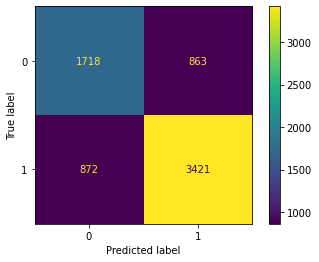

In [7]:
metrics.plot_confusion_matrix(classifier_DT, x_test, y_test)

### Calculate precision and recall

#### precision:

$precision = \frac{number \ true \ positives}{number \ true \ positives \ + \ number \ false \ positives}$

#### recall:

$recall = \frac{number \ true \ positives}{number \ true \ positives \ + \ number \ false \ negatives}$

#### balanced accuracy

$\frac{recall \ + \ precison}{2}$